# PARTE A
cercare le onde stazionarie di una corda di lunghezza fissa (L = 1m), in seguito ripetere variando la tensione

In [7]:
import numpy as np
import pandas as pd
from typing import Final
import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'misurazione1_2.csv' # la prima misurazione il peso toccava il banco

AMPIEZZA : Final = 5 # Volt ampiezza dell'oscillazione
L: Final = 1 # m

fr = pd.read_csv(FILE, sep = ';')  # fileread

masse = np.array(fr['massa']) * 0.001 #Kg
f1 = np.array(fr['f1']) #Hz float per evitare errori nella stima della covarianza di curve_fit
f2 = np.array(fr['f2'])
f3 = np.array(fr['f3'])
f4 = np.array(fr['f4'])

n_armonica = np.array([1,2,3,4]) # armoniche instaurate
ERRORE_SENSIBILITA_OSCILLOSCOPIO: Final = 1.0 # Hz


### verifica $\nu \propto N_{nodi}$

B: 18.00000000001122, sigmaB: 5.687208108250799e-12, chi: 0.0
B: 24.09999999722999, sigmaB: 0.26457513267748534, chi: 0.005
B: 27.200000000000433, sigmaB: inf, chi: 0.0172
B: 33.900000001125285, sigmaB: 0.5196152313962501, chi: 0.0208


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


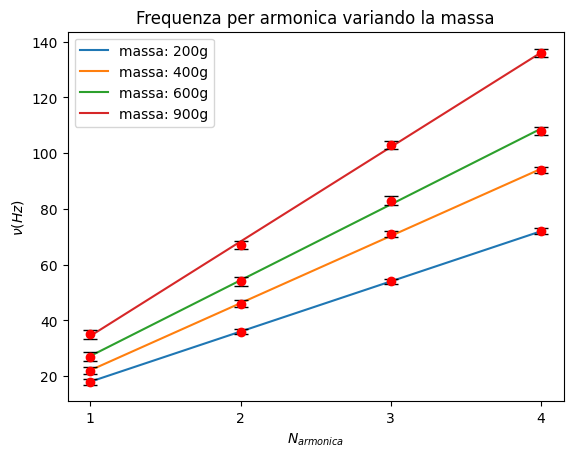

In [8]:
from interpolazione3 import RettaInterpolata
import matplotlib.pyplot as plt

for i in range(0,len(masse)):
    f = np.array([f1[i],f2[i],f3[i],f4[i]])
    r = RettaInterpolata(n_armonica,f,ERRORE_SENSIBILITA_OSCILLOSCOPIO)
    print(f'B: {r.B}, sigmaB: {r.sigmaB}, chi: {r.rchisquare}')
    plt.plot(r.x_best,r.y_best,label=f"massa: {int(masse[i]*1000)}g")
    plt.errorbar(n_armonica,f,yerr=r.sigmaY,fmt='o', ecolor='black', color="red", capsize=5)

plt.title("Frequenza per armonica variando la massa")
plt.xlabel("$N_{armonica}$")
plt.ylabel(f"${chr(92)}nu (Hz)$")
plt.xticks(n_armonica)
plt.legend()
plt.show()

### Confronto con valore di frequenza atteso:

$\nu_n = \frac{n}{2L}\sqrt{\frac{\tau}{\mu}}$

- n: numero di armonica
- $\nu$: frequenza
- $L$: lunghezza della corda
- $\tau$: tensione ($mg$)
- $\mu$: densità lineare della corda

l'esperimento precendente viene ripetuto, grazie alla misura della densità lineare, della lunghezza della corda e della tensione si può ricavare la frequenza teorica delle armoniche che si instaurano.
Qui sotto vengono confrontati i valori teorici con i dati raccolti

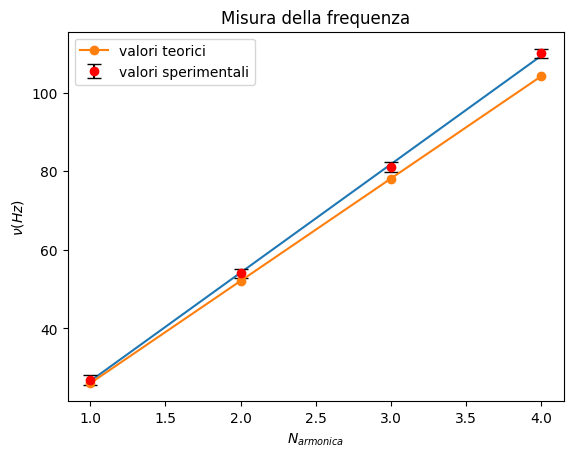

f_misurate:  [ 27  54  81 110]
f_teoriche:  [ 26.  52.  78. 104.]
distanza in sigma:  [0.8 1.5 2.3 4.6]


In [9]:
n = 2
L = 0.82 # m
tau = 0.4 * 9.81 #N
m = 4.3 * 0.001 #Kg
l_corda = 2.0 #m
mu = m / l_corda

f_misurate = np.array([27, 54, 81, 110])

def nu(n):
    return (n/(2*L))*np.sqrt(tau/mu)

f_teoriche = nu(n_armonica)

r = RettaInterpolata(n_armonica,f_misurate,1)

plt.title('Misura della frequenza')
plt.plot(r.x_best,r.y_best)
plt.errorbar(n_armonica,f_misurate,yerr=r.sigmaY,fmt='o', ecolor='black', color="red", capsize=5, label='valori sperimentali')
plt.plot(n_armonica,f_teoriche,'o-',label='valori teorici')
plt.legend()
plt.xlabel('$N_{armonica}$')
plt.ylabel(f"${chr(92)}nu (Hz)$")
plt.show()

print('f_misurate: ',f_misurate)
print('f_teoriche: ',np.round(f_teoriche,0))
print('distanza in sigma: ',np.round(np.abs(f_teoriche - f_misurate)/r.sigmaY,1))


###  Velocità di propagazione $v$:

$\nu_n = \frac{nv}{2L} \Rightarrow v = \frac{2L\nu_n}{n}$

In [14]:
# velocità misurate:
v = np.round(2 * L * f_misurate / n_armonica,1)
sigma_v = np.round(2 * L * r.sigmaY / n_armonica,1)

# velocità attesa in funzione della densità lineare della corda e della tensione_

v_attesa = np.round(2 * L * f_teoriche / n_armonica,1)

print(v,' sigma: ',sigma_v)
print(v_attesa)
print('distanza dal valore atteso in sigma: ',np.round(np.abs(v-v_attesa)/sigma_v,1))

[44.3 44.3 44.3 45.1]  sigma:  [2.1 1.  0.7 0.5]
[42.7 42.7 42.7 42.7]
distanza dal valore atteso in sigma:  [0.8 1.6 2.3 4.8]
